In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 300)

In [66]:
churn_data = pd.read_csv("/Users/vaibhavpatil/Downloads/train.csv")
churn_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [67]:
churn_data.shape

(1460, 81)

In [68]:
churn_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [8]:
# look at missing value ratio in each column
churn_data.isnull().sum()*100/churn_data.shape[0]

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

### Univariate Analysis

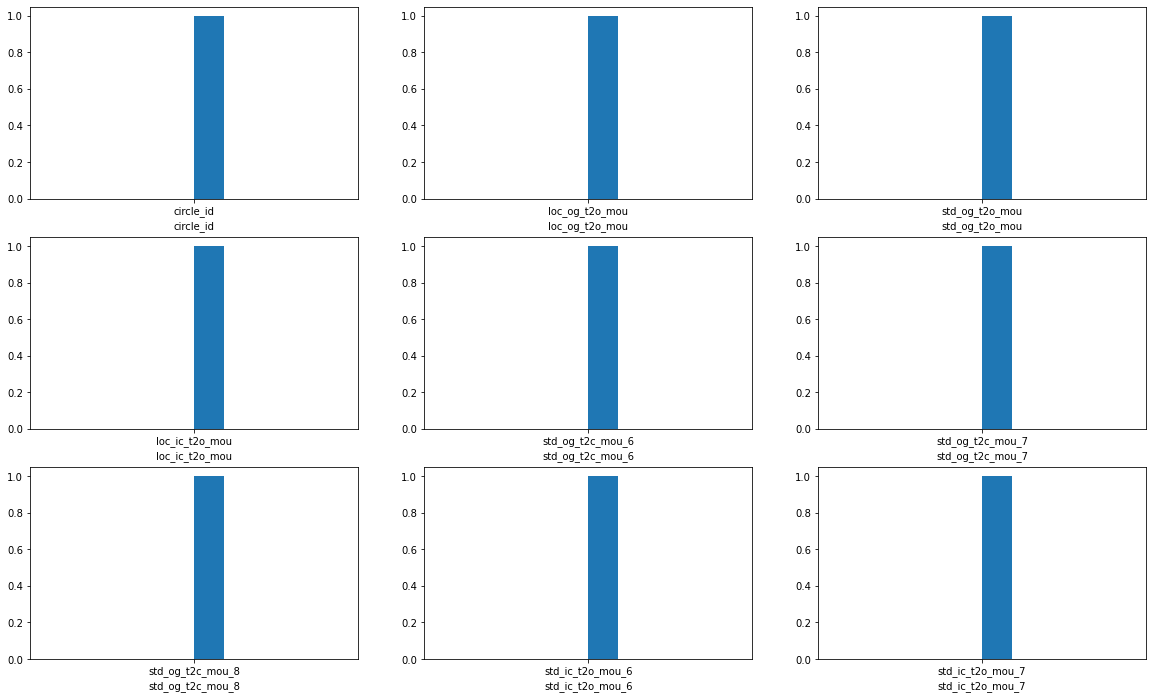

In [69]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 1)
plt.hist(x = "circle_id", data = churn_data)
plt.xlabel("circle_id")
plt.subplot(3, 3, 2)
plt.hist(x = "loc_og_t2o_mou", data = churn_data)
plt.xlabel("loc_og_t2o_mou")
plt.subplot(3, 3, 3)
plt.hist(x = "std_og_t2o_mou", data = churn_data)
plt.xlabel("std_og_t2o_mou")
plt.subplot(3, 3, 4)
plt.hist(x = "loc_ic_t2o_mou", data = churn_data)
plt.xlabel("loc_ic_t2o_mou")
plt.subplot(3, 3, 5)
plt.hist(x = "std_og_t2c_mou_6", data = churn_data)
plt.xlabel("std_og_t2c_mou_6")
plt.subplot(3, 3, 6)
plt.hist(x = "std_og_t2c_mou_7", data = churn_data)
plt.xlabel("std_og_t2c_mou_7")
plt.subplot(3, 3, 7)
plt.hist(x = "std_og_t2c_mou_8", data = churn_data)
plt.xlabel("std_og_t2c_mou_8")
plt.subplot(3, 3, 8)
plt.hist(x = "std_ic_t2o_mou_6", data = churn_data)
plt.xlabel("std_ic_t2o_mou_6")
plt.subplot(3, 3, 9)
plt.hist(x = "std_ic_t2o_mou_7", data = churn_data)
plt.xlabel("std_ic_t2o_mou_7")
plt.show()

<h4 style = "color : orange">From above subplot we found that all above columns is having single value, Hence column doesn't add any sense with single value so let's drop those columns.</h4>

In [64]:
churn_data.drop(coluXmns=["circle_id", "loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "id"], inplace=True)

TypeError: drop() got an unexpected keyword argument 'coluXmns'

In [65]:
churn_data.shape

(1460, 81)

In [71]:
print(churn_data["last_date_of_month_6"].value_counts())
print(churn_data["last_date_of_month_7"].value_counts())
print(churn_data["last_date_of_month_8"].value_counts())

KeyError: 'last_date_of_month_6'

<h4 style = "color : orange">From above seems that last_date_of_month_6, last_date_of_month_7, last_date_of_month_8 is having single value, Hence column doesn't add any sense with single value so let's drop those columns.</h4>

In [70]:
churn_data.drop(columns=["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8"], inplace=True)

KeyError: "['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'] not found in axis"

In [14]:
churn_data.shape

(69999, 158)

In [15]:
# Found few more columns which are date columns. So let's drop those columns
date_cols = ['date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'
            ]
churn_data.drop(columns= date_cols, inplace=True)

In [16]:
churn_data.shape

(69999, 152)

In [17]:
# Look at missing value ratio in each column
churn_data.isnull().sum()

arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            2768
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           2768
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          2768
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          2768
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       2768
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       2768
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       2768
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       2768
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           2768
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6       2768
std_og_t2t_mou_7       2687
std_og_t2t_mou_8       3703
std_og_t2m_mou_6       2768
std_og_t2m_mou_7       2687
std_og_t2m_mou_8    

In [18]:
# create a list of columns where we will impute missing values with zeroes
zero_impute_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
        'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
        'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
        'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']

In [73]:
# impute missing values with 0
churn_data[zero_impute_columns] = churn_data[zero_impute_columns].apply(lambda x: x.fillna(0))

NameError: name 'zero_impute_columns' is not defined

In [74]:
# look at missing value ratio in each column
churn_data.isnull().sum()*100/churn_data.shape[0]

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [21]:
churn_data["arpu_6"].value_counts()

 0.000      2603
 20.000       72
-5.000        72
 1.000        49
 1.500        38
            ... 
 119.580       1
 393.027       1
 48.879        1
 179.191       1
 168.269       1
Name: arpu_6, Length: 61615, dtype: int64

In [22]:
churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 152 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   

In [23]:
churn_data[churn_data.duplicated()]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


In [72]:
# replace missing values with '-1' in categorical columns
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
churn_data[cat_cols] = churn_data[cat_cols].apply(lambda x: x.fillna(-1))

KeyError: "None of [Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',\n       'fb_user_7', 'fb_user_8'],\n      dtype='object')] are in the [columns]"

In [25]:
# look at missing value ratio in each column
churn_data.isnull().sum()*100/churn_data.shape[0]

arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_t2t_mou_6      3.954342
std_og_t2t_mou_7      3.838626
std_og_t

In [26]:
# It seems that there are few more columns with missing values where we will impute values with zeroes
cols = churn_data.columns
for column in cols:
    churn_data[column].fillna(0, inplace=True)

In [75]:
# look at missing value ratio in each column
churn_data.isnull().sum()*100/churn_data.shape[0]

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [28]:
churn_data["churn_probability"].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [29]:
churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 152 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   

In [30]:
y = churn_data.pop("churn_probability")
X = churn_data

In [31]:
# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [32]:
churn_data.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,...,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
arpu_6,1.000000,0.743730,0.643193,0.450632,0.324784,0.259506,0.616059,0.455762,0.358563,0.132511,0.089524,0.086243,0.235952,0.172643,0.140823,0.237552,0.199410,0.181197,0.435082,0.360952,0.311930,0.190971,0.162799,0.149672,0.070772,0.027451,0.017975,0.431472,0.359189,0.315364,0.363922,0.249171,0.187141,0.386478,0.265942,0.184352,0.088255,0.066865,0.057118,0.490014,0.337046,0.243462,0.414701,0.383877,0.368865,0.124931,0.069070,0.057522,0.049298,0.005663,...,0.220152,0.140115,0.090065,0.083564,0.268311,0.190482,0.182690,0.068360,0.036549,0.037439,0.206712,0.150080,0.128874,0.304331,0.208202,0.199644,0.089947,0.052497,0.038079,0.249904,0.200779,0.190453,0.327601,0.234046,0.220197,0.308948,0.217521,0.206357,0.207499,0.141668,0.148876,0.101695,0.058688,0.047390,0.049431,0.026238,0.029319,0.261292,0.186164,0.179641,0.085993,0.066930,0.050399,0.204766,0.138843,0.136559,0.025875,0.168365,0.184225,0.217785
arpu_7,0.743730,1.000000,0.782332,0.321251,0.431210,0.343558,0.466002,0.600463,0.468836,0.098842,0.100561,0.093823,0.169041,0.208508,0.166858,0.180509,0.230131,0.194931,0.327490,0.424296,0.354208,0.164291,0.196798,0.168257,0.039281,0.058209,0.045070,0.326868,0.419849,0.351279,0.253254,0.353094,0.274625,0.283670,0.389052,0.283675,0.071248,0.090955,0.069477,0.350795,0.485500,0.365633,0.382435,0.445676,0.404003,0.086171,0.108407,0.088985,0.024534,0.009066,...,0.273247,0.089645,0.151356,0.108316,0.190753,0.269001,0.201078,0.034851,0.076835,0.054880,0.151754,0.218173,0.153862,0.210422,0.312247,0.225998,0.058506,0.091960,0.061617,0.185759,0.270625,0.217570,0.230301,0.331306,0.243713,0.218309,0.316029,0.231257,0.145838,0.208214,0.173979,0.059918,0.106007,0.059303,0.023609,0.058365,0.044841,0.193652,0.274479,0.204451,0.061984,0.094972,0.065798,0.142230,0.205292,0.162228,0.023818,0.189943,0.218318,0.171154
arpu_8,0.643193,0.782332,1.000000,0.241236,0.327209,0.424127,0.369390,0.471039,0.596954,0.086138,0.080138,0.107834,0.152164,0.163597,0.210659,0.154616,0.187985,0.228002,0.286161,0.349620,0.427052,0.152999,0.167682,0.194028,0.025340,0.037130,0.075463,0.284257,0.345230,0.418687,0.176954,0.260231,0.345901,0.193642,0.285178,0.385638,0.069783,0.084723,0.088631,0.242548,0.357159,0.479150,0.367724,0.408140,0.421977,0.096902,0.106482,0.129847,0.018258,0.002597,...,0.347832,0.069023,0.099632,0.161945,0.171386,0.199108,0.280466,0.020962,0.043971,0.087714,0.129733,0.158208,0.218285,0.184296,0.217002,0.322959,0.044819,0.060259,0.093289,0.163538,0.200398,0.270242,0.201525,0.234489,0.340620,0.191594,0.224684,0.321948,0.120602,0.153914,0.231291,0.057779,0.070582,0.109078,0.009912,0.0315

In [33]:
cols_scale = X_train.columns.to_list()
scaler = StandardScaler()
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
X_test[cols_scale] = scaler.transform(X_test[cols_scale])

### Principal Component Analysis

In [34]:
pca = PCA(random_state=42)
pca.fit(X_train)
pca.components_

array([[ 1.34513063e-01,  1.40912331e-01,  1.34578058e-01, ...,
         1.15119612e-01,  1.17209283e-01,  1.11724265e-01],
       [ 1.15600675e-01,  1.22182054e-01,  1.14214918e-01, ...,
        -6.66323757e-02, -6.92620354e-02, -6.75536266e-02],
       [-5.12517215e-02, -6.82319017e-02, -6.08725916e-02, ...,
         1.36726139e-02,  1.36130375e-02,  1.45388519e-02],
       ...,
       [-0.00000000e+00, -9.02713950e-17,  5.56235468e-17, ...,
        -6.52441408e-17,  5.82821953e-17,  8.90517460e-17],
       [ 0.00000000e+00,  1.39080616e-16,  1.01521405e-15, ...,
        -5.64426445e-17,  8.46788365e-17, -9.76481763e-17],
       [ 0.00000000e+00,  4.81920218e-16,  4.70593968e-17, ...,
        -5.97376745e-17,  1.08491709e-16, -3.07731075e-17]])

In [35]:
pca.explained_variance_ratio_

array([1.31648164e-01, 9.57123850e-02, 6.21537428e-02, 5.21526601e-02,
       3.76555644e-02, 3.12331052e-02, 2.79184071e-02, 2.49085101e-02,
       2.38035570e-02, 2.13664355e-02, 2.04588976e-02, 2.03291035e-02,
       1.90764091e-02, 1.80844533e-02, 1.67136094e-02, 1.60650353e-02,
       1.51609517e-02, 1.44804533e-02, 1.40121493e-02, 1.37023815e-02,
       1.16267223e-02, 1.11850592e-02, 1.07351525e-02, 1.06832834e-02,
       1.02208249e-02, 1.00869762e-02, 9.62741083e-03, 8.69754036e-03,
       8.46718453e-03, 8.03459498e-03, 7.59569940e-03, 7.43732557e-03,
       7.24889358e-03, 6.78011652e-03, 6.56103715e-03, 6.31247503e-03,
       6.26132155e-03, 6.16042064e-03, 6.12698464e-03, 5.93846951e-03,
       5.73466376e-03, 5.68971217e-03, 5.62007865e-03, 5.57081344e-03,
       5.47698871e-03, 4.89111615e-03, 4.71480064e-03, 4.58588894e-03,
       4.11188750e-03, 3.91885765e-03, 3.63764656e-03, 3.60572415e-03,
       3.55282447e-03, 3.51427011e-03, 3.30301293e-03, 3.18572882e-03,
      

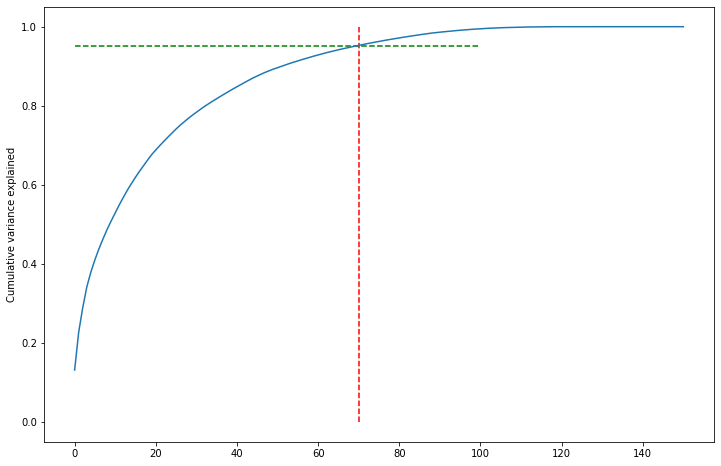

In [36]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [37]:
pca_final = IncrementalPCA(n_components=70)

In [38]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(48999, 70)

In [39]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(70, 70)

In [40]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(21000, 70)

In [41]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)
pred_probs_test = model_pca.predict_proba(df_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

In [42]:
# Predictions on the train set
y_train_pred = model_pca.predict(df_train_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[43462   504]
 [ 3868  1165]]


In [43]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [44]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9107736892589645
Sensitivity:- 0.23147228293264455
Specificity:- 0.9885365964609016


In [45]:
# Prediction on the test set
y_test_pred = model_pca.predict(df_test_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[18654   247]
 [ 1614   485]]


In [46]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [47]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9113809523809524
Sensitivity:- 0.23106241067174846
Specificity:- 0.9869319083646368


### Decision Tree without PCA

In [48]:
dt = DecisionTreeClassifier(random_state = 42)
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [4, 6, 10, 12, 15],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [4, 6, 10, 12, 15]},
             scoring='accuracy', verbose=1)

In [59]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

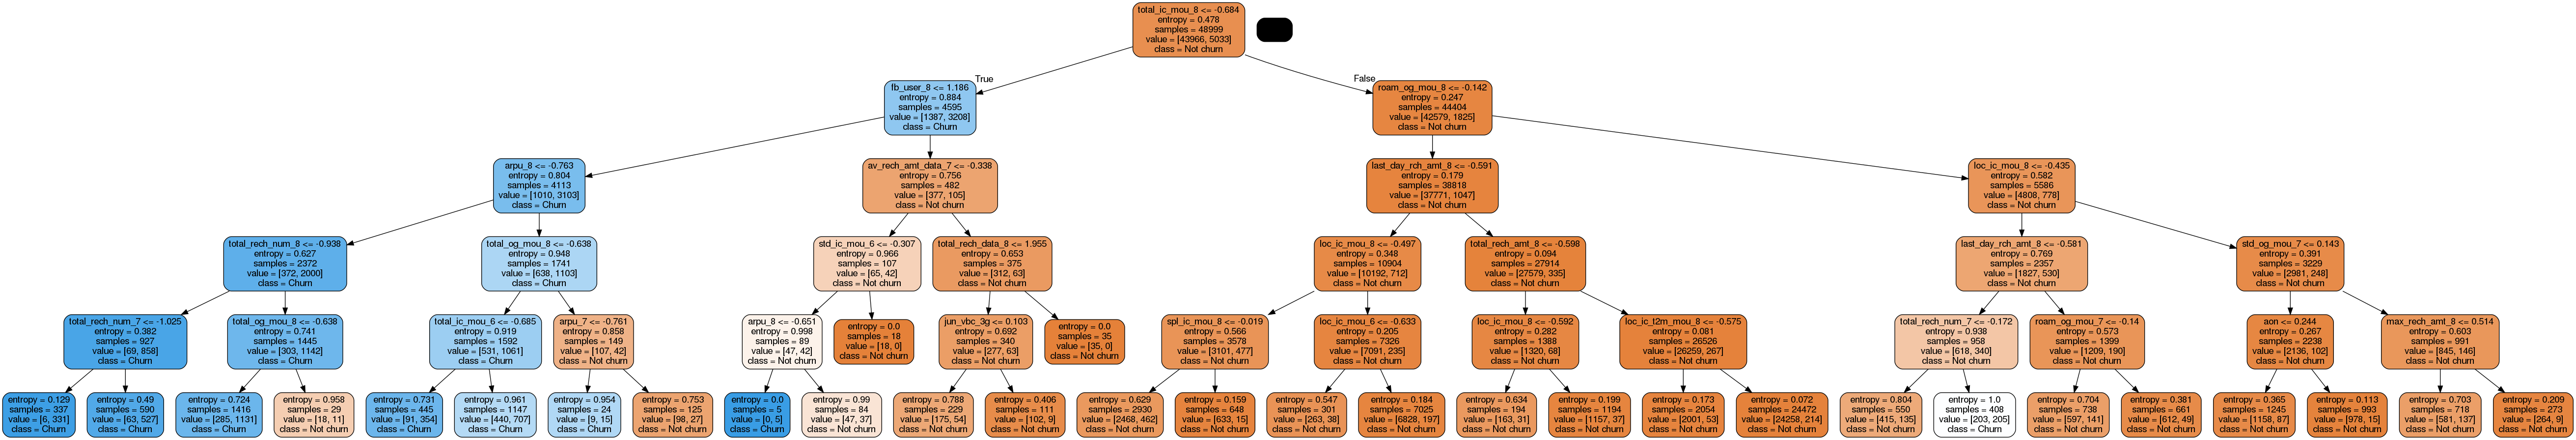

In [50]:
dot_data = StringIO()  
export_graphviz(dt_best, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Not churn', "Churn"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [51]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

In [52]:
print(metrics.accuracy_score(y_train, y_train_pred))
metrics.confusion_matrix(y_train, y_train_pred)

0.9417335047654034


array([[42869,  1097],
       [ 1758,  3275]])

In [53]:
print(metrics.accuracy_score(y_test, y_test_pred))
metrics.confusion_matrix(y_test, y_test_pred)

0.9414761904761905


array([[18433,   468],
       [  761,  1338]])

### Decision tree with PCA

In [54]:
dt_pca = DecisionTreeClassifier(random_state = 42)
params = {
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [50, 70],
    'criterion': ["gini", "entropy"]
}
grid_search_pca = GridSearchCV(estimator=dt_pca, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search_pca.fit(df_train_pca, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [50, 70]},
             scoring='accuracy', verbose=1)

In [58]:
dt_pca_best = grid_search_pca.best_estimator_
dt_pca_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=70, random_state=42)

In [55]:
rfc_model = RandomForestClassifier(bootstrap=True,
                                   random_state=42,
                                   max_depth=10,
                                   min_samples_leaf=70)
rfc_model.fit(df_train_pca, y_train)
y_train_pred = rfc_model.predict(df_train_pca)
y_test_pred = rfc_model.predict(df_test_pca)

In [56]:
print("Training Accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print(metrics.confusion_matrix(y_train, y_train_pred))
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9105287863017613
[[43792   174]
 [ 4210   823]]
Testing Accuracy: 0.9087619047619048
[[18798   103]
 [ 1813   286]]
